<a href="https://colab.research.google.com/github/nirmalaIndia/qmc/blob/master/Create_a_AI_VGG_classifier_NIRMALA_verJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Deep Learning Classifier (VGG neural network)

## Binary classifier ( number of classes = 2) 

In [0]:
#!pip install q keras==2.2.4

Paper https://www.nature.com/articles/sdata2018172

Dataset https://b2share.eudat.eu/records/80df8606fcdb4b2bae1656f0dc6db8ba

##Authored by Dr V Nirmala,Dept of Physics, Queen Mary's College, Chennai
Teenoja, II MSc, Queen Mary's College, Chennai




```
# This is a  Deep Learning based CNN Image classifer, transfer learning is used. Intial layers are set to trainable , then other layers

Goal is is to improve the accuracy. e 
Final output is a trained model file. it will be downloaded into the hardisk. 
```



In [2]:
#delete the directory named mynewfiles including its subfolders with the rm -r command 
!rm -r mynewfiles
!rm -r tempzipfolder

rm: cannot remove 'mynewfiles': No such file or directory
rm: cannot remove 'tempzipfolder': No such file or directory


In [0]:
!mkdir mynewfiles
!mkdir tempzipfolder

#  **Step 1:**  Decide how many classes(n) and download the images into n folders 
a. Decide number of types of classify  (Do you want to segregate the images into 2 buckets ? Or do you want to segreagate into 5 buckets)  

```
# SET_NUMBER_OF_CLASSES = 2
```



b. Create folder1, folder2, folder3.... based on number of buckets 

```
# 
mkdir mynewfiles/folder3
mkdir mynewfiles/folder4

```



c. Download the ZIP files from the Dataset ( https://b2share.eudat.eu/records/80df8606fcdb4b2bae1656f0dc6db8ba), extract the files 

d. Based on the n folders, copy the respective files into n classes. Plan this step carefully . Example you can download 3 tar files such as Nanowires , Tips, Particles, Then move them into 2 folders. You want to find is it a nanowire or not a nanowire. So other images you put into folder2.  

```
# 
  mv tempzipfolder/Nanowires/*.*    mynewfiles/folder1

  mv tempzipfolder/Tips/*.*    mynewfiles/folder2  
  
  mv tempzipfolder/Particles/*.*    mynewfiles/folder2
```





In [0]:
!mkdir mynewfiles/folder1
!mkdir mynewfiles/folder2

In [5]:
# source URL for dataset: https://b2share.eudat.eu/records/72758204db9044ab8b3e6b6c4d2eb576

!wget https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/Nanowires.tar -O /tmp/dir2.tar

!wget https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/MEMS_devices_and_electrodes.tar -O /tmp/dir1.tar

--2020-02-23 13:57:38--  https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/Nanowires.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2203371520 (2.1G) [application/octet-stream]
Saving to: ‘/tmp/dir2.tar’

/tmp/dir2.tar       100%[===================>]   2.05G  73.8MB/s    in 28s     

2020-02-23 13:58:07 (73.8 MB/s) - ‘/tmp/dir2.tar’ saved [2203371520/2203371520]

--2020-02-23 13:58:09--  https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/MEMS_devices_and_electrodes.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3305451520 (3.1G) [application/octet-stream]
Saving to: ‘/tmp/dir1.tar’

/tmp/dir1.tar        12%[=>                  ] 380.33M

In [6]:
!ls /tmp


dir1.tar  dir2.tar


In [7]:
!ls mynewfiles

folder1  folder2


In [0]:
!tar xf  /tmp/dir1.tar  -C tempzipfolder

In [0]:
!tar xf  /tmp/dir2.tar -C tempzipfolder

In [10]:
!ls tempzipfolder/

MEMS_devices_and_electrodes  Nanowires


In [0]:
SET_NUMBER_OF_CLASSES = 2

In [12]:
!ls

mynewfiles  sample_data  tempzipfolder


In [0]:
!mv tempzipfolder/MEMS_devices_and_electrodes/*.*    mynewfiles/folder1

In [0]:
!mv tempzipfolder/Nanowires/*.*    mynewfiles/folder2

In [15]:
!ls mynewfiles

folder1  folder2


In [16]:
!pwd

/content


In [0]:
#!wget https://b2share.eudat.eu/api/files/e3126ced-cb0b-4fde-a081-1aad550cae86/Particles.tar -O /tmp/dir2.tar
  
#!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Patterned_surface.tar -O /tmp/dir2.tar

In [18]:
!ls /tmp


dir1.tar  dir2.tar


In [19]:
!ls mynewfiles

folder1  folder2


In [0]:
# Delete a random set of files so that we can experiement fast. delete all files in this folder except keep 150 files
# Good idea to play with 100 files. Once we are confident, we can run the same experiment to 1000 files as it save waiting time for us
#!find mynewfiles/Biological -type f -print0 | sort -zR | tail -zn +150 | xargs -0 rm


In [0]:
#count no of files in a directory folder
#!ls mynewfiles/Biological   -1 | wc -l

In [0]:
#!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Tips.tar -O /tmp/dir3.tar

In [0]:
#!tar xvf  /tmp/dir3.tar -C mynewfiles

In [0]:
#!ls mynewfiles

#Goal: Just understand the high level concept 
###( let's understand the big picture , don't worry about the coding details right now..)

In [24]:
!ls mynewfiles

folder1  folder2


In [25]:
!pwd

/content


In [26]:
!ls

mynewfiles  sample_data  tempzipfolder


In [27]:
import os

ListofmyFolders = []


for i in range(SET_NUMBER_OF_CLASSES):
  ListofmyFolders.append( os.path.join('mynewfiles/folder' + str(i+1))  )
  print('total training images:', len(os.listdir(ListofmyFolders[i])))



total training images: 4583
total training images: 3815


total training images: 4583
mynewfiles/folder1/L8_c9ed6268fac42f123c0cdb6a18b7a94c.jpg
(768, 1024, 3)


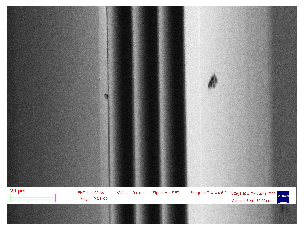

mynewfiles/folder1/L8_d51c76acc2b287b679822bcc416b162b.jpg
(768, 1024, 3)


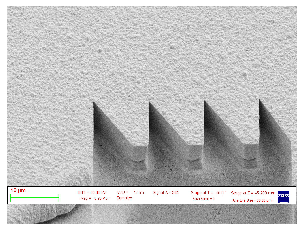

mynewfiles/folder1/L8_6a4ac351187308f771f355b20d5c295c.jpg
(768, 1024, 3)


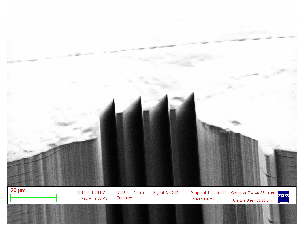

mynewfiles/folder1/L8_02302179d820ab6e32fafb55c40f646c.jpg
(768, 1024, 3)


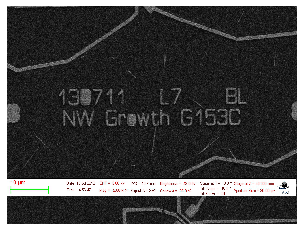

mynewfiles/folder1/L8_d3d5ad30ab32321d9454455fa6585a2a.jpg
(768, 1024, 3)


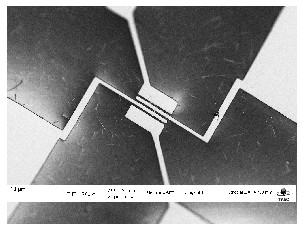

mynewfiles/folder1/L8_e545d7399c733946d29ea3eb739c2c23.jpg
(768, 1024, 3)


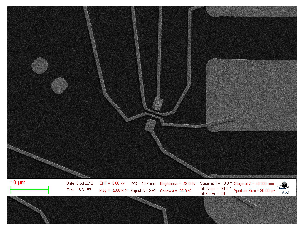

total training images: 3815
mynewfiles/folder2/L6_ca0a7bc8d769c3a5976f91ef855875c1.jpg
(768, 1024, 3)


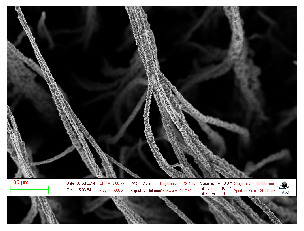

mynewfiles/folder2/L6_2b5f48e43dc8ee902cabc484d0397d44.jpg
(768, 1024, 3)


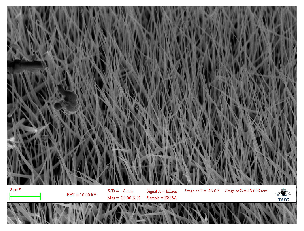

mynewfiles/folder2/L6_e833ef57c7d192b6fe23efefcb1b4ddd.jpg
(768, 1024, 3)


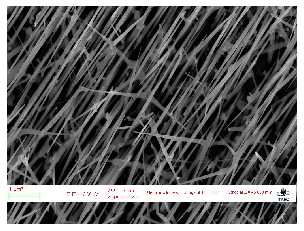

mynewfiles/folder2/L6_3b8ced98e2961b16c13cea62a559502f.jpg
(768, 1024, 3)


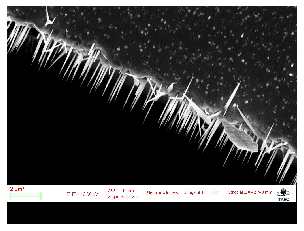

mynewfiles/folder2/L6_4f5b80df31da63cb609e07f4abb0c984.jpg
(768, 1024, 3)


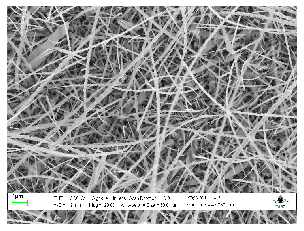

mynewfiles/folder2/L6_2b77ed4c6b754235fce1dbd69d228ead.jpg
(768, 1024, 3)


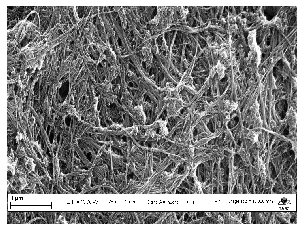

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 246 #@param {type:"slider", min:2, max:400, step:1}


for i in range(SET_NUMBER_OF_CLASSES):
  print('total training images:', len(os.listdir(ListofmyFolders[i])))
  rock_files = os.listdir(ListofmyFolders[i])

  next_rock = [os.path.join(ListofmyFolders[i], fname) 
                for fname in rock_files[pic_index-6:pic_index]]
  for i, img_path in enumerate(next_rock):
    #print(img_path)
    img = mpimg.imread(img_path)
    print(img_path)
    print(img.shape)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()


#**Step 2** Trouble shoot if the system gives error message

If you see Out of Memory error, Change the SETBATCHSIZE to lower number such as 32 instead of 128

```
# SETBATCHSIZE = 128 
```



In [0]:
SIZE = 150

In [0]:
SETBATCHSIZE=128


In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "mynewfiles/"

datagen = ImageDataGenerator(validation_split=0.1, rescale=1./255,      rotation_range=0,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,                                                                
     fill_mode='nearest')

train_generator = datagen.flow_from_directory(
    TRAINING_DIR, 
    subset='training',
    target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=SETBATCHSIZE,
	  class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    subset='validation',
    	target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=SETBATCHSIZE,
	class_mode='categorical'
)




test_datagen = ImageDataGenerator( rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(SIZE,SIZE),
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

In [0]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [0]:
from keras.applications import VGG16

pre_trained_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(SIZE, SIZE, 3))



In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [0]:
#last_layer = pre_trained_model.get_layer('mixed7')

last_layer = pre_trained_model.get_layer('block5_conv1')
print(last_layer.output_shape)
last_output = last_layer.output

In [0]:
ispostmixed = False 

for layer in pre_trained_model.layers:
  if layer.name == "block5_conv1":
    ispostmixed = True
  if ispostmixed == True:
    layer.trainable = True
    print(layer.name)

In [0]:
from keras import layers





In [0]:
from keras import Model
#model = Model(pre_trained_model.input, x)





In [0]:
# Flatten the output layer to 1 dimension


last_layer = pre_trained_model.get_layer('block5_conv3')
print(last_layer.output_shape)
last_output = last_layer.output


x = layers.Conv2D( filters=100,  kernel_size=(3, 3), strides=(1, 1), activation="relu", name='Nirmala') (last_output)
#x = layers.Conv2D( filters=30,  kernel_size=(3, 3), strides=(1, 1), activation="relu", name='test2') (x)
#x = layers.Conv2D( filters=10,  kernel_size=(3, 3), strides=(1, 1), activation="relu", name='test3') (x)


x = layers.Flatten(name='Nirmala_qmc')(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(4000, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization() (x)

x = layers.Dense(2, activation='softmax')(x)

In [0]:
if False:
  last_layer = pre_trained_model.get_layer('block5_conv1')
  print(last_layer.output_shape)
  last_output = last_layer.output

  ispostmixed = False 

  for layer in pre_trained_model.layers:
    if layer.name == "block5_conv1":
      ispostmixed = True
    if ispostmixed == True:
      layer.trainable = True
      print(layer.name)

  from keras import layers

  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)
  x = layers.BatchNormalization() (x)
  # Add a fully connected layer with 1,024 hidden units and ReLU activation
  x = layers.Dense(5000, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)
  x = layers.BatchNormalization() (x)
  x = layers.Dense(512, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  x = layers.BatchNormalization() (x)
  x = layers.Dense(2, activation='softmax')(x)

In [0]:
from keras import Model
model = Model(pre_trained_model.input, x)

In [0]:
model.summary()



In [0]:
count = 1
for alayer in model.layers:
  print( str(count) + '    \t \t \t ' + str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable) )
  count = count + 1 

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

print('No of training images   = ' + str(train_generator.n))
print('No of validation images = ' + str(validation_generator.n))
print('No of folders           = ' + str(train_generator.num_classes))

In [0]:
#train_generator.num_classes

In [0]:
if STEP_SIZE_VALID == 0:
  STEP_SIZE_VALID = 1

In [0]:
#STEPSPEREPOCH = 7600 // 128
#STEPSPEREPOCH

In [0]:
# Flatten the output layer to 1 dimension


last_layer = pre_trained_model.get_layer('block5_conv3')
print(last_layer.output_shape)
last_output = last_layer.output

x = layers.Conv2D( filters=100,  kernel_size=(3, 3), strides=(1, 1), activation="relu", name='Nirmala') (last_output)
x = layers.Conv2D( filters=30,  kernel_size=(3, 3), strides=(1, 1), activation="relu", name='Teenoja') (x)
x = layers.Conv2D( filters=10,  kernel_size=(3, 3), strides=(1, 1), activation="relu", name='Queen_Marys_college') (x)


x = layers.Flatten()(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(128, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization() (x)

x = layers.Dense(2, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

(None, 9, 9, 512)


In [0]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [0]:
count = 1
for alayer in model.layers:
  print( str(count) + '    \t \t \t ' + str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable) )
  count = count + 1 

1    	 	 	 input_1    	 	 	 True
2    	 	 	 block1_conv1    	 	 	 True
3    	 	 	 block1_conv2    	 	 	 True
4    	 	 	 block1_pool    	 	 	 True
5    	 	 	 block2_conv1    	 	 	 True
6    	 	 	 block2_conv2    	 	 	 True
7    	 	 	 block2_pool    	 	 	 True
8    	 	 	 block3_conv1    	 	 	 True
9    	 	 	 block3_conv2    	 	 	 True
10    	 	 	 block3_conv3    	 	 	 True
11    	 	 	 block3_pool    	 	 	 True
12    	 	 	 block4_conv1    	 	 	 True
13    	 	 	 block4_conv2    	 	 	 True
14    	 	 	 block4_conv3    	 	 	 True
15    	 	 	 block4_pool    	 	 	 True
16    	 	 	 block5_conv1    	 	 	 True
17    	 	 	 block5_conv2    	 	 	 True
18    	 	 	 block5_conv3    	 	 	 True
19    	 	 	 Nirmala    	 	 	 True
20    	 	 	 Teenoja    	 	 	 True
21    	 	 	 Queen_Marys_college    	 	 	 True
22    	 	 	 flatten_3    	 	 	 True
23    	 	 	 dense_7    	 	 	 True
24    	 	 	 dropout_4    	 	 	 True
25    	 	 	 batch_normalization_4    	 	 	 True
26    	 	 	 dense_8    	 	 	 True


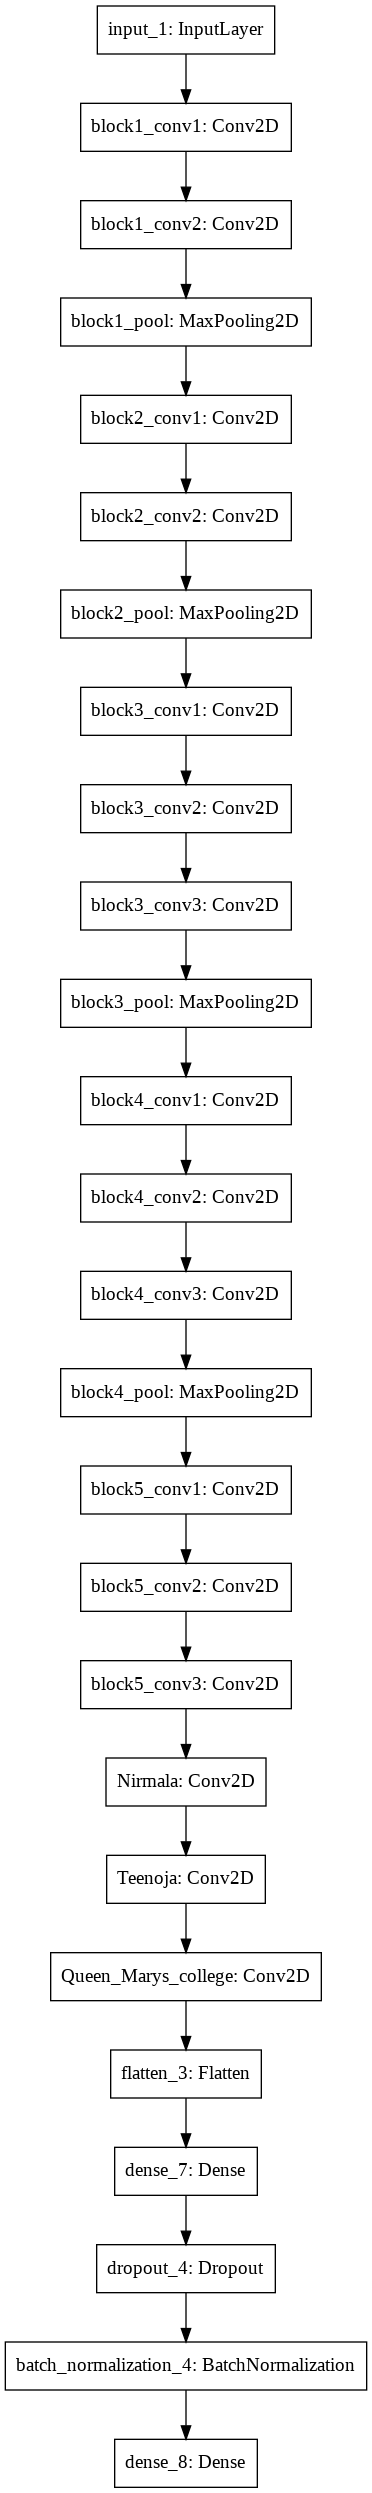

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
earlystopcallingback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)

In [0]:
bestmodelcheckpoint = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=4, validation_data = validation_generator , verbose = 1, steps_per_epoch=STEP_SIZE_TRAIN, validation_steps=STEP_SIZE_VALID,
                              callbacks=[earlystopcallingback, bestmodelcheckpoint]
                              )

#model.save("rps.h5")

Epoch 1/4
59/59 [==============================] - 186s 3s/step - loss: 0.4089 - acc: 0.8122 - val_loss: 3.1455 - val_acc: 0.6758

Epoch 00001: val_acc improved from -inf to 0.67578, saving model to best_model.h5
Epoch 2/4
59/59 [==============================] - 185s 3s/step - loss: 0.2550 - acc: 0.8958 - val_loss: 1.2106 - val_acc: 0.7707

Epoch 00002: val_acc improved from 0.67578 to 0.77075, saving model to best_model.h5
Epoch 3/4
59/59 [==============================] - 186s 3s/step - loss: 0.2167 - acc: 0.9139 - val_loss: 0.3380 - val_acc: 0.8748

Epoch 00003: val_acc improved from 0.77075 to 0.87482, saving model to best_model.h5
Epoch 4/4
59/59 [==============================] - 182s 3s/step - loss: 0.2285 - acc: 0.9119 - val_loss: 0.6790 - val_acc: 0.8354

Epoch 00004: val_acc did not improve from 0.87482
Epoch 00004: early stopping


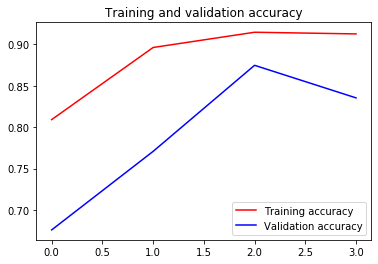

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

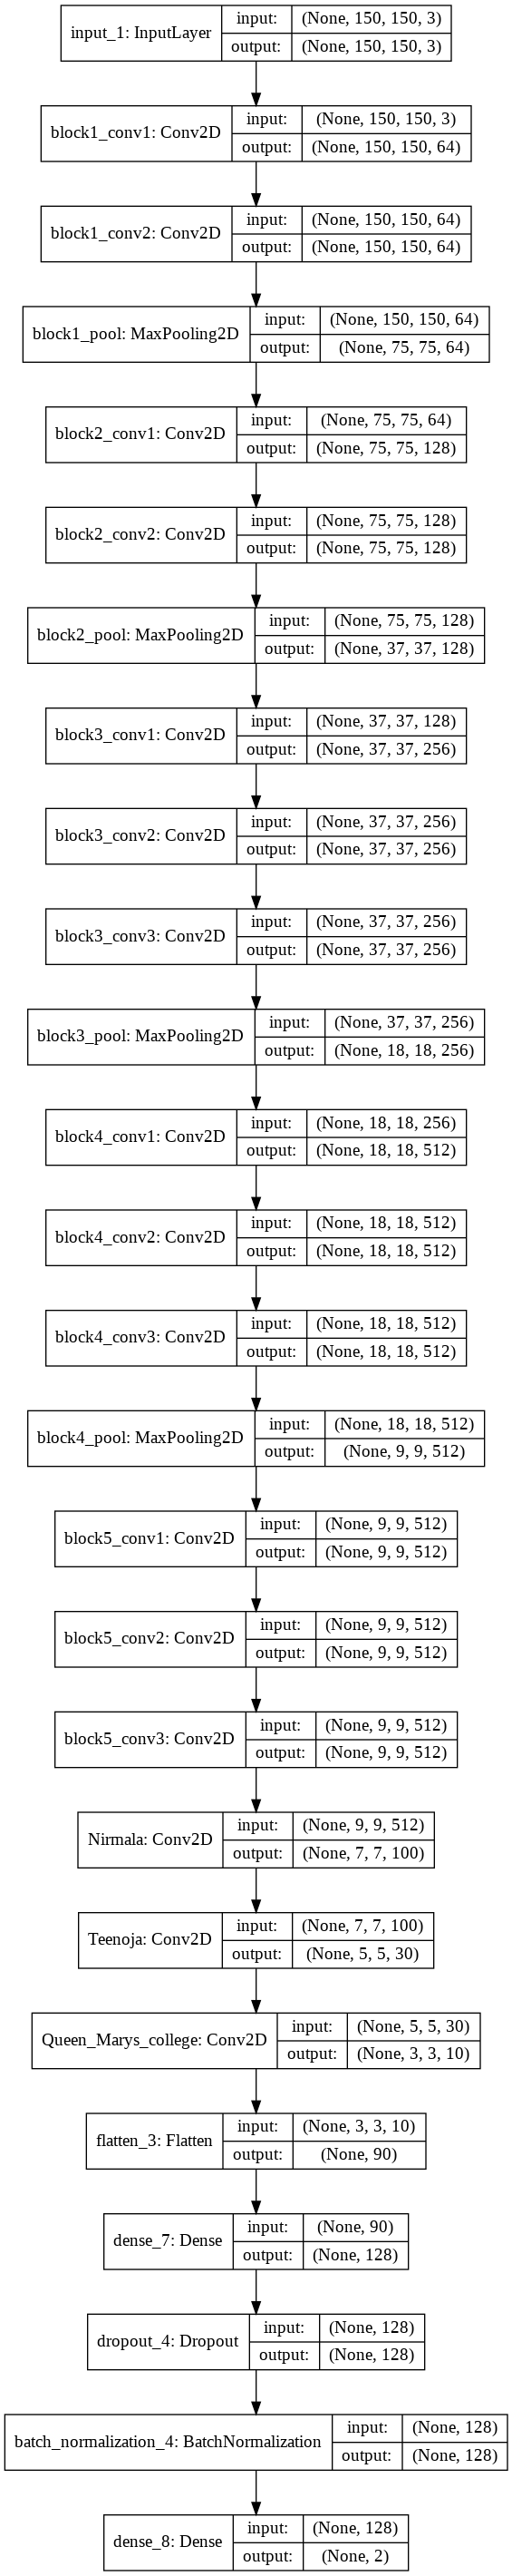

In [120]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='modela.png')

In [0]:
for layer in model.layers:
  layer.trainable = True

In [0]:
count = 1
for alayer in model.layers:
  print( str(count) + '    \t \t \t ' + str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable) )
  count = count + 1 

1    	 	 	 input_1    	 	 	 True
2    	 	 	 block1_conv1    	 	 	 True
3    	 	 	 block1_conv2    	 	 	 True
4    	 	 	 block1_pool    	 	 	 True
5    	 	 	 block2_conv1    	 	 	 True
6    	 	 	 block2_conv2    	 	 	 True
7    	 	 	 block2_pool    	 	 	 True
8    	 	 	 block3_conv1    	 	 	 True
9    	 	 	 block3_conv2    	 	 	 True
10    	 	 	 block3_conv3    	 	 	 True
11    	 	 	 block3_pool    	 	 	 True
12    	 	 	 block4_conv1    	 	 	 True
13    	 	 	 block4_conv2    	 	 	 True
14    	 	 	 block4_conv3    	 	 	 True
15    	 	 	 block4_pool    	 	 	 True
16    	 	 	 block5_conv1    	 	 	 True
17    	 	 	 block5_conv2    	 	 	 True
18    	 	 	 block5_conv3    	 	 	 True
19    	 	 	 Nirmala    	 	 	 True
20    	 	 	 Teenoja    	 	 	 True
21    	 	 	 Queen_Marys_college    	 	 	 True
22    	 	 	 flatten_3    	 	 	 True
23    	 	 	 dense_7    	 	 	 True
24    	 	 	 dropout_4    	 	 	 True
25    	 	 	 batch_normalization_4    	 	 	 True
26    	 	 	 dense_8    	 	 	 True


In [0]:
earlystopcallingback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)

bestmodelcheckpoint = ModelCheckpoint('best_model_final.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [0]:
#model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history1 = model.fit_generator(train_generator, epochs=3, validation_data = validation_generator , verbose = 1, steps_per_epoch=STEP_SIZE_TRAIN, validation_steps=STEP_SIZE_VALID,
                              callbacks=[earlystopcallingback, bestmodelcheckpoint]
                              )

#model.save("rps.h5")

Epoch 1/3
59/59 [==============================] - 189s 3s/step - loss: 0.2102 - acc: 0.9205 - val_loss: 0.4041 - val_acc: 0.8490

Epoch 00001: val_acc improved from -inf to 0.84896, saving model to best_model_final.h5
Epoch 2/3
59/59 [==============================] - 191s 3s/step - loss: 0.2047 - acc: 0.9188 - val_loss: 0.2163 - val_acc: 0.9325

Epoch 00002: val_acc improved from 0.84896 to 0.93249, saving model to best_model_final.h5
Epoch 3/3
59/59 [==============================] - 188s 3s/step - loss: 0.1854 - acc: 0.9257 - val_loss: 0.1890 - val_acc: 0.9226

Epoch 00003: val_acc did not improve from 0.93249


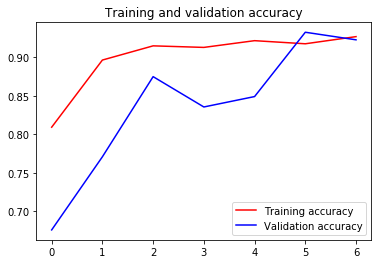

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

accTotal = acc + acc1
val_accTotal = val_acc + val_acc1

epochs = range(len(acc))

plt.plot( accTotal, 'r', label='Training accuracy')
plt.plot( val_accTotal, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
import math


print(  'epoch   Val Accuacy           ,      Train Accuracy'  )
for i in range(len( val_accTotal )):
  print( str(i) + '  ,      ' + str( round( 100* float( val_accTotal[i] ) , 2 ))  +    '              ,         ' + str( round( 100* float( accTotal[i] ) , 2 )) )

epoch   Val Accuacy           ,      Train Accuracy
0  ,      67.58              ,         80.92
1  ,      77.07              ,         89.64
2  ,      87.48              ,         91.48
3  ,      83.54              ,         91.28
4  ,      84.9              ,         92.15
5  ,      93.25              ,         91.75
6  ,      92.26              ,         92.68


#**Step 3:** Best trained neural network model is saved here.  Note it will large file, so upload it to Google Drive by mounting it..  

In [0]:
!ls

best_model_final.h5  model.png	 mynewfilesTEST  tempzipfolder
best_model.h5	     mynewfiles  sample_data


In [0]:
from google.colab import files


In [0]:
#files.download("best_model_final.h5")


In [0]:
#from google.colab import drive 
#drive.mount('/nanoaid')

# New Section

 **Final step**  
 1. Give a good name to the file 
 2. Save to file by un-commenting
 

In [0]:
#!cp best_model_final.h5 "/content/drive/My Drive/best_model_final12DecNiRMALAFile21.h5"

In [0]:
!ls -l * 

-rw-r--r-- 1 root root 121843696 Feb 23 14:47 best_model_final.h5
-rw-r--r-- 1 root root 121843696 Feb 23 14:37 best_model.h5
-rw-r--r-- 1 root root     79194 Feb 23 14:28 model.png

mynewfiles:
total 584
drwxr-xr-x 2 root root 319488 Feb 23 14:02 folder1
drwxr-xr-x 2 root root 278528 Feb 23 14:02 folder2

mynewfilesTEST:
total 8
drwxr-xr-x 2 root root 4096 Feb 23 14:28 folder1
drwxr-xr-x 2 root root 4096 Feb 23 14:28 folder2

sample_data:
total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Feb  5 18:37 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Feb  5 18:37 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Feb  5 18:37 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Feb  5 18:37 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md

tempzipfolder:
total 568
drwxrwxr-x 2 2009 999 294912 Feb 23 14:02 MEMS_devices_and_electrodes
drwxrwxr-x 2 2009 999 278528 Feb 23 14:02 Nanowires


In [0]:

#files.download("vggMEMSwires2.h5")


In [0]:
!ls

best_model_final.h5  model.png	 mynewfilesTEST  tempzipfolder
best_model.h5	     mynewfiles  sample_data


In [0]:
#files.download("vggMEMSwires.h5")

In [0]:
#history = model.fit_generator(train_generator, epochs=4, validation_data = validation_generator , verbose = 1)


In [0]:
test_generator.reset()


In [0]:
#STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size

import numpy as np

predictions =model.predict_generator(test_generator, steps=10, verbose=1)
print(predictions)

predicted_class_indices=np.argmax(predictions,axis=1)
print(predicted_class_indices)

labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictionsanswers = [labels[k] for k in predicted_class_indices]



10/10 [==============================] - 1s 104ms/step
[[0.00965828 0.99034166]
 [0.00965828 0.99034166]
 [0.00965828 0.99034166]
 [0.00965828 0.99034166]
 [0.00965828 0.99034166]
 [0.00965828 0.99034166]
 [0.00965828 0.99034166]
 [0.00965828 0.99034166]
 [0.00965828 0.99034166]
 [0.00965828 0.99034166]]
[1 1 1 1 1 1 1 1 1 1]


In [0]:
predictions = model.predict_generator( train_generator , 6)



In [0]:
print(predictions)



[[9.6689469e-01 3.3105325e-02]
 [3.7947085e-02 9.6205294e-01]
 [2.2115579e-04 9.9977881e-01]
 ...
 [9.6842211e-01 3.1577900e-02]
 [7.8473824e-01 2.1526171e-01]
 [1.0034988e-02 9.8996502e-01]]


In [0]:
predicted_class_indices=np.argmax(predictions,axis=-1)
print(predicted_class_indices)


[0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1
 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0
 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0
 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0
 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0
 1 1 1 0 1 1 1 0 1 0 0 0 

In [0]:
filenames=test_generator.filenames

print(filenames)

['folder1/L6_df5afd543288f2ebfff42f8b4d8ad694.jpg']


In [0]:
len(filenames)

1

In [119]:
for i in range( 3):
 print(predictionsanswers[i] , filenames[i] ) 



folder2 folder1/L6_df5afd543288f2ebfff42f8b4d8ad694.jpg


IndexError: ignored

#Step 4: Visvalize

Just change the slider below and then Run After this cell (Control + F10)

# Step 5: Final Predictions

In [0]:
!rm -r mynewfilesTEST

!mkdir mynewfilesTEST
!mkdir mynewfilesTEST/folder1
!mkdir mynewfilesTEST/folder2

In [0]:
#@title Select a random file to predict. { run: "auto" }

import random 

pic_index = 72 #@param {type:"slider", min:2, max:800, step:1}


randomclass = random.randint(0, 1)


print(randomclass)
#randomclass = 0 #@param {type:"slider", min:0, max:1, step:1}


selectafile = "" 

for i in range(SET_NUMBER_OF_CLASSES):
  print('total training images:', len(os.listdir(ListofmyFolders[i])))

  if i==randomclass :
    rock_files = os.listdir(ListofmyFolders[i])


    next_rock = [os.path.join(ListofmyFolders[i], fname) 
                  for fname in rock_files[pic_index-1:pic_index]]

    for i, img_path in enumerate(next_rock):


        print(img_path)
        img = mpimg.imread(img_path)
        print(img_path)
        print(img.shape)
        plt.imshow(img)
        plt.axis('Off')
        plt.show()
        selectafile = img_path






print(selectafile)
import shutil, os
folder = 'mynewfilesTEST/folder1/'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

newPath = shutil.copy(selectafile, 'mynewfilesTEST/folder1/')

TESTINGNEWDIR = 'mynewfilesTEST'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        TESTINGNEWDIR,
        target_size=(150, 150),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

print('Input files to AI are the following..')


predict = model.predict_generator(test_generator,steps = nb_samples)

print(predict)
predicted_class_indices=np.argmax(predict,axis=1)
print(predicted_class_indices)

labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictionsanswers = [labels[k] for k in predicted_class_indices]

print(predicted_class_indices[0])

from IPython.core.display import display, HTML


if predicted_class_indices[0] == 0:
  print('AI output : AI thinks this is a SEM image of a MEMS')
  display(HTML('<h1 >AI output : AI thinks this is a SEM image of a MEMS</h1>'))
else:
    print('AI output : AI thinks this is a SEM image of a nanowire')
    display(HTML('<h1>AI output : AI thinks this is a SEM image of a nanowire</h1>'))